# Team Project #1
## Author: Elijah Sartin and Adham Howaidy
## Version: 0.1.0
## Spring 2022 Section 01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import data file.

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

Quick look at the dataset

In [4]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [5]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

Reorder columns to a more preferable order and drop the ones we don't want to look at

In [6]:
df = df[['pokedex_number', 'name', 'japanese_name', 'classfication', 'type1', 'type2', 'abilities', 'base_total','hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed',
       'height_m', 'weight_kg', 'base_egg_steps', 'base_happiness', 'capture_rate', 'experience_growth', 'percentage_male', 
       'generation', 'is_legendary', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water']]

In [7]:
df.drop(columns=['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'experience_growth'], inplace=True)

Rename misspelled column name

In [8]:
df.rename(columns={'classfication':'classification'}, inplace=True)

In [9]:
df.head()

,pokedex_number,name,japanese_name,classification,type1,type2,abilities,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,base_egg_steps,base_happiness,capture_rate,percentage_male,generation,is_legendary
0,1,Bulbasaur,Fushigidaneフシギダネ,Seed Pokémon,grass,poison,"['Overgrow', 'Chlorophyll']",318,45,49,49,65,65,45,0.7,6.9,5120,70,45,88.1,1,0
1,2,Ivysaur,Fushigisouフシギソウ,Seed Pokémon,grass,poison,"['Overgrow', 'Chlorophyll']",405,60,62,63,80,80,60,1.0,13.0,5120,70,45,88.1,1,0
2,3,Venusaur,Fushigibanaフシギバナ,Seed Pokémon,grass,poison,"['Overgrow', 'Chlorophyll']",625,80,100,123,122,120,80,2.0,100.0,5120,70,45,88.1,1,0
3,4,Charmander,Hitokageヒトカゲ,Lizard Pokémon,fire,NaN,"['Blaze', 'Solar Power']",309,39,52,43,60,50,65,0.6,8.5,5120,70,45,88.1,1,0
4,5,Charmeleon,Lizardoリザード,Flame Pokémon,fire,NaN,"['Blaze', 'Solar Power']",405,58,64,58,80,65,80,1.1,19.0,5120,70,45,88.1,1,0


Check for missing data

In [10]:
df.isnull().sum()

pokedex_number       0
name                 0
japanese_name        0
classification       0
type1                0
type2              384
abilities            0
base_total           0
hp                   0
attack               0
defense              0
sp_attack            0
sp_defense           0
speed                0
height_m            20
weight_kg           20
base_egg_steps       0
base_happiness       0
capture_rate         0
percentage_male     98
generation           0
is_legendary         0
dtype: int64

Check data types

In [11]:
df.dtypes

pokedex_number       int64
name                object
japanese_name       object
classification      object
type1               object
type2               object
abilities           object
base_total           int64
hp                   int64
attack               int64
defense              int64
sp_attack            int64
sp_defense           int64
speed                int64
height_m           float64
weight_kg          float64
base_egg_steps       int64
base_happiness       int64
capture_rate        object
percentage_male    float64
generation           int64
is_legendary         int64
dtype: object

In [12]:
df = df.astype({"is_legendary": object})

In [14]:
df.dtypes

pokedex_number       int64
name                object
japanese_name       object
classification      object
type1               object
type2               object
abilities           object
base_total           int64
hp                   int64
attack               int64
defense              int64
sp_attack            int64
sp_defense           int64
speed                int64
height_m           float64
weight_kg          float64
base_egg_steps       int64
base_happiness       int64
capture_rate        object
percentage_male    float64
generation           int64
is_legendary        object
dtype: object

Get descriptive statistics

In [15]:
df.describe()

,pokedex_number,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,base_egg_steps,base_happiness,percentage_male,generation
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,781.000000,781.000000,801.000000,801.000000,703.000000,801.000000
mean,401.000000,428.377029,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582,1.163892,61.378105,7191.011236,65.362047,55.155761,3.690387
std,231.373075,119.203577,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662,1.080326,109.354766,6558.220422,19.598948,20.261623,1.930420
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.100000,0.100000,1280.000000,0.000000,0.000000,1.000000
25%,201.000000,320.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,0.600000,9.000000,5120.000000,70.000000,50.000000,2.000000
50%,401.000000,435.000000,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000,1.000000,27.300000,5120.000000,70.000000,50.000000,4.000000
75%,601.000000,505.000000,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000,1.500000,64.800000,6400.000000,70.000000,50.000000,5.000000
max,801.000000,780.000000,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000,14.500000,999.900000,30720.000000,140.000000,100.000000,7.000000


Gather categorical dispersion numbers

In [16]:
df.classification.groupby(df.classification).count()

classification
Abundance Pokémon                                      1
Acorn Pokémon                                          1
Alpha Pokémon                                          1
Angler Pokémon                                         1
Ant Pit Pokémon                                        1
Anteater Pokémon                                       1
Antenna Pokémon                                        1
Aquamouse Pokémon                                      1
Aquarabbit Pokémon                                     1
Arm Thrust Pokémon                                     1
Armor Bird Pokémon                                     1
Armor Pokémon                                          2
Arrow Quill Pokémon                                    1
Artificial Pokémon                                     1
Astral Body Pokémon                                    1
Atrocious Pokémon                                      1
Attaching Pokémon                                      1
Aura Pokémon    

In [17]:
df.type1.groupby(df.type1).count()

type1
bug          72
dark         29
dragon       27
electric     39
fairy        18
fighting     28
fire         52
flying        3
ghost        27
grass        78
ground       32
ice          23
normal      105
poison       32
psychic      53
rock         45
steel        24
water       114
Name: type1, dtype: int64

In [18]:
df.type2.groupby(df.type2).count()

type2
bug          5
dark        21
dragon      17
electric     9
fairy       29
fighting    25
fire        13
flying      95
ghost       14
grass       20
ground      34
ice         15
normal       4
poison      34
psychic     29
rock        14
steel       22
water       17
Name: type2, dtype: int64

In [19]:
df.abilities.groupby(df.abilities).count()

abilities
['Adaptability', 'Download', 'Analytic']                                                      1
['Aftermath', 'Unburden', 'Flare Boost']                                                      2
['Air Lock']                                                                                  1
['Anticipation', 'Dry Skin', 'Poison Touch']                                                  2
['Anticipation', 'Overcoat']                                                                  1
['Aura Break', 'Power Construct']                                                             1
['Bad Dreams']                                                                                1
['Battery']                                                                                   1
['Battle Armor', 'Sniper', 'Keen Eye']                                                        2
['Battle Armor', 'Swift Swim']                                                                2
['Battle Armor']              

In [20]:
df.corr()

,pokedex_number,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,base_egg_steps,base_happiness,percentage_male,generation
pokedex_number,1.000000,0.140363,0.108079,0.137633,0.102412,0.109285,0.093848,0.004294,0.008580,0.123567,0.197278,-0.154776,-0.035846,0.985904
base_total,0.140363,1.000000,0.620624,0.730134,0.629620,0.741120,0.717434,0.547666,0.535063,0.458111,0.496466,-0.274795,0.098462,0.084358
hp,0.108079,0.620624,1.000000,0.410616,0.242378,0.365973,0.366971,0.160760,0.478369,0.427743,0.359218,-0.108217,-0.059014,0.074065
attack,0.137633,0.730134,0.410616,1.000000,0.468915,0.368154,0.265836,0.352703,0.423160,0.382183,0.331088,-0.251811,0.190035,0.101375
defense,0.102412,0.629620,0.242378,0.468915,1.000000,0.241882,0.526348,0.007934,0.361938,0.424067,0.265230,-0.191503,0.044706,0.057603
sp_attack,0.109285,0.741120,0.365973,0.368154,0.241882,1.000000,0.511496,0.438981,0.353007,0.245218,0.404477,-0.228924,0.102876,0.070146
sp_defense,0.093848,0.717434,0.366971,0.265836,0.526348,0.511496,1.000000,0.225977,0.328327,0.306523,0.335404,-0.149719,0.009703,0.048711
speed,0.004294,0.547666,0.160760,0.352703,0.007934,0.438981,0.225977,1.000000,0.202202,0.051384,0.289447,-0.148753,0.056960,-0.019914
height_m,0.008580,0.535063,0.478369,0.423160,0.361938,0.353007,0.328327,0.202202,1.000000,0.626551,0.381455,-0.343394,0.040893,-0.025525
weight_kg,0.123567,0.458111,0.427743,0.382183,0.424067,0.245218,0.306523,0.051384,0.626551,1.000000,0.443286,-0.405840,0.047131,0.085767


<AxesSubplot:>

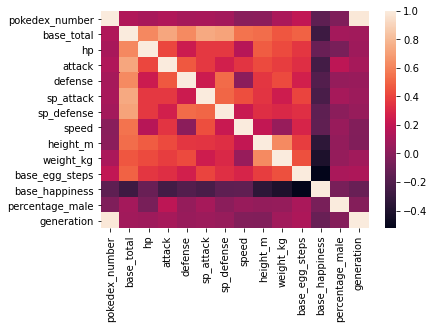

In [21]:
sns.heatmap(df.corr())

Create visualizations

Text(0, 0.5, 'Number of Pokémon')

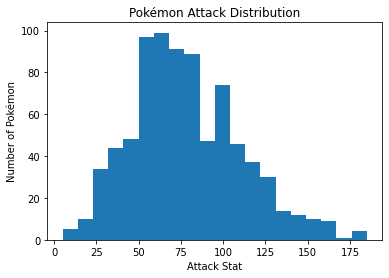

In [42]:
plt.hist(df.attack, bins=20)
plt.title('Pokémon Attack Distribution')
plt.xlabel('Attack Stat')
plt.ylabel('Number of Pokémon')

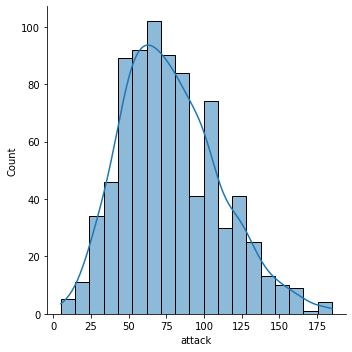

In [43]:
sns.displot(df.attack, kde='true')

Text(0, 0.5, 'Number of Pokémon')

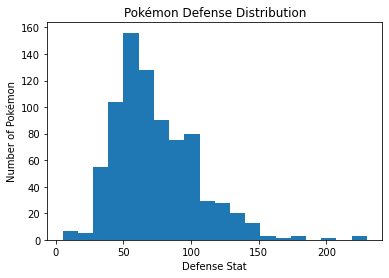

In [23]:
plt.hist(df.defense, bins=20)
plt.title('Pokémon Defense Distribution')
plt.xlabel('Defense Stat')
plt.ylabel('Number of Pokémon')

Text(0, 0.5, 'Number of Pokémon')

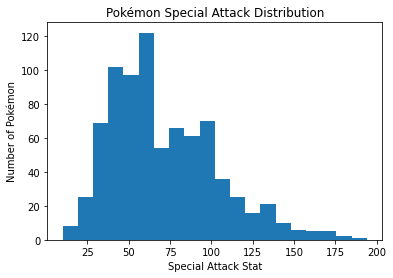

In [24]:
plt.hist(df.sp_attack, bins=20)
plt.title('Pokémon Special Attack Distribution')
plt.xlabel('Special Attack Stat')
plt.ylabel('Number of Pokémon')

Text(0, 0.5, 'Number of Pokémon')

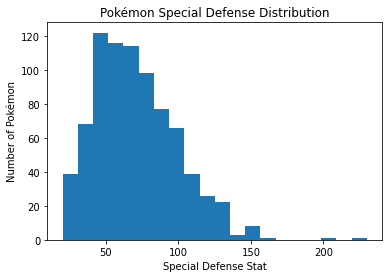

In [25]:
plt.hist(df.sp_defense, bins=20)
plt.title('Pokémon Special Defense Distribution')
plt.xlabel('Special Defense Stat')
plt.ylabel('Number of Pokémon')

Text(0, 0.5, 'Number of Pokémon')

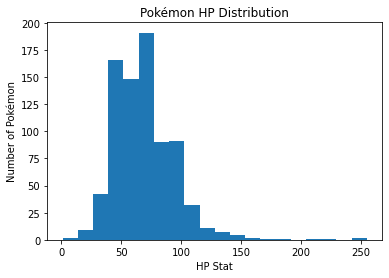

In [26]:
plt.hist(df.hp, bins=20)
plt.title('Pokémon HP Distribution')
plt.xlabel('HP Stat')
plt.ylabel('Number of Pokémon')

Text(0, 0.5, 'Number of Pokémon')

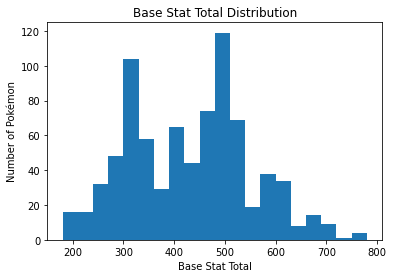

In [27]:
plt.hist(df.base_total, bins=20)
plt.title('Base Stat Total Distribution')
plt.xlabel('Base Stat Total')
plt.ylabel('Number of Pokémon')

Text(0, 0.5, 'Height in M')

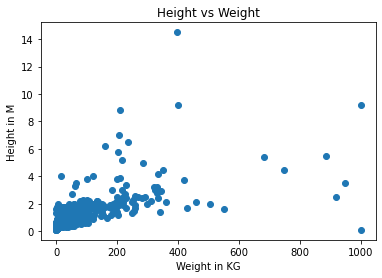

In [28]:
plt.scatter(df.weight_kg, df.height_m)
plt.title('Height vs Weight')
plt.xlabel('Weight in KG')
plt.ylabel('Height in M')

Text(0, 0.5, 'Speed')

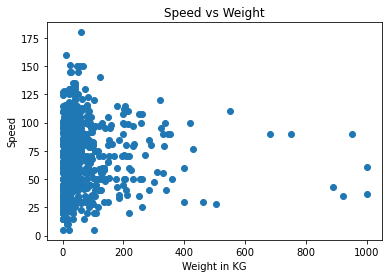

In [29]:
plt.scatter(df.weight_kg, df.speed)
plt.title('Speed vs Weight')
plt.xlabel('Weight in KG')
plt.ylabel('Speed')

Text(0, 0.5, 'HP')

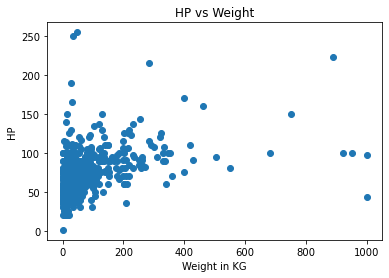

In [30]:
plt.scatter(df.weight_kg, df.hp)
plt.title('HP vs Weight')
plt.xlabel('Weight in KG')
plt.ylabel('HP')

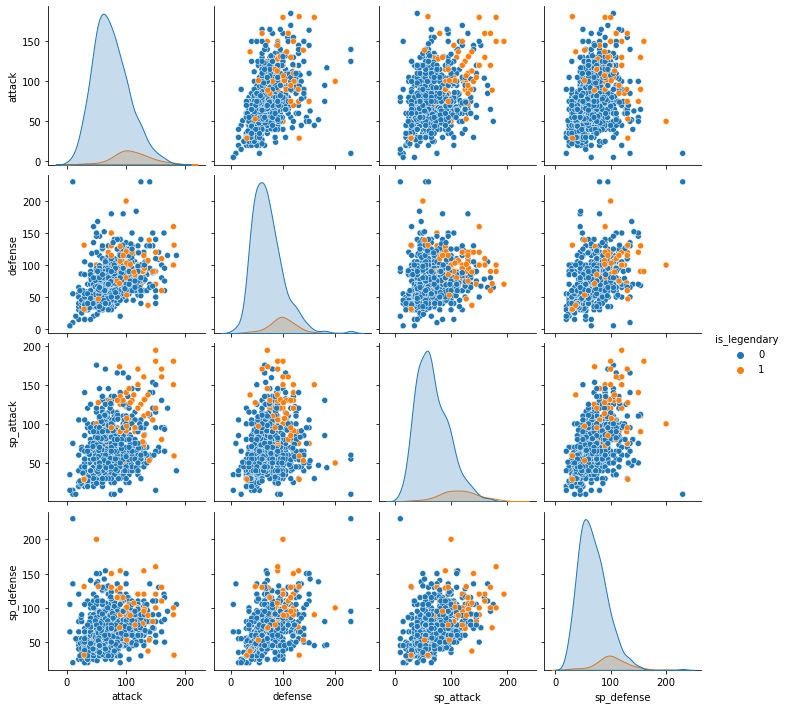

In [31]:
sns.pairplot(df[['attack','defense','sp_attack','sp_defense','is_legendary']], hue='is_legendary')

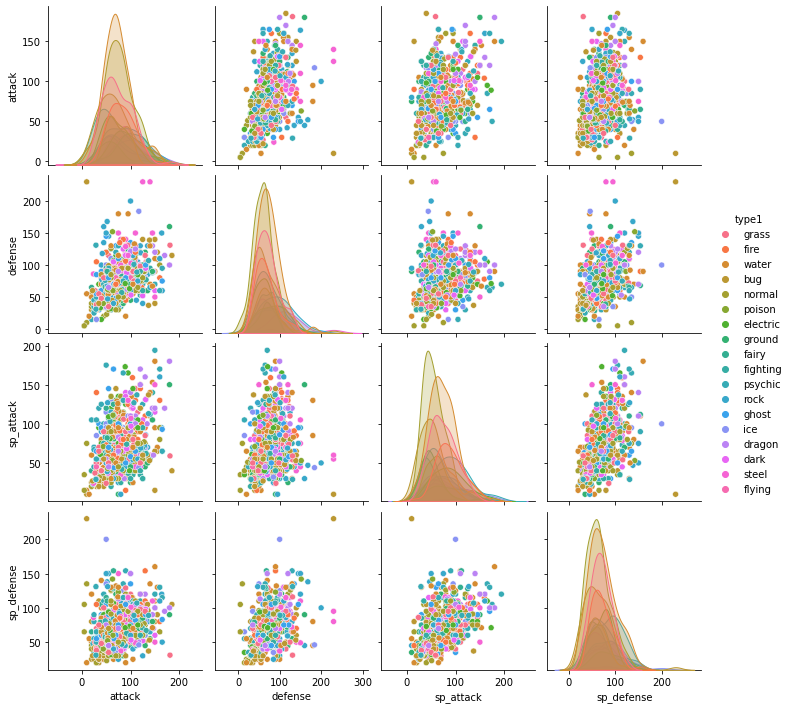

In [32]:
sns.pairplot(df[['attack','defense','sp_attack','sp_defense','type1']], hue='type1')

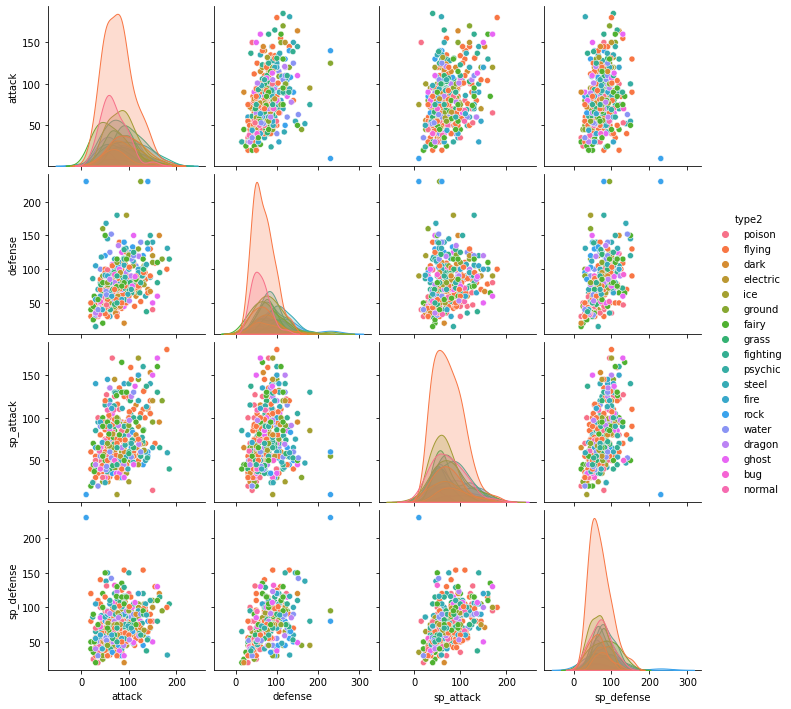

In [33]:
sns.pairplot(df[['attack','defense','sp_attack','sp_defense','type2']], hue='type2')

In [36]:
type1 = df.type1.groupby(df.type1).count()

Text(0, 0.5, 'Primary Typing')

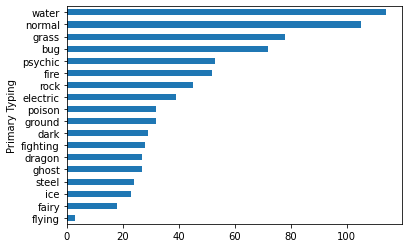

In [38]:
barh_type1 = plt.figure()
type1.sort_values().plot(kind='barh')
plt.ylabel('Primary Typing')

In [39]:
type2 = df.type2.groupby(df.type2).count()

Text(0, 0.5, 'Secondary Typing')

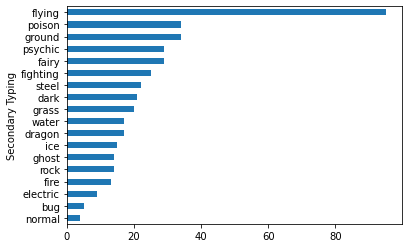

In [41]:
barh_type2 = plt.figure()
type2.sort_values().plot(kind='barh')
plt.ylabel('Secondary Typing')